# DSI Project 2 - Ames Housing Regression Challenge
## Sam Chakerian - 8/23 
### Workflow:
1. Read in
2. EDA
3. Cleaning/Preprocessing
4. Feature selection
5. ElasticNet Regularization
6. Make Submission .csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, ElasticNetCV
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error, r2_score
from sklearn.feature_selection import f_regression, SelectKBest, RFE

# 1. Read in

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# Optional - FRED
fred = pd.read_csv('./fred.csv')

# 2. EDA
1. Describe
2. Find nulls
3. Check dtypes (non ints => dummies later)

In [4]:
# Check for negative values and weird outliers.
train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [5]:
print(train.shape)
train.head()

(2051, 81)


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [6]:
print(test.shape)
test.head()

(879, 80)


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


# 3. Preprocessing / cleaning
1. Check nulls.
2. Add FRED.
1. Separate int/floats.
2. Take out what we don't need (targets, IDs, categorical numbers).

## 1. Check nulls

In [7]:
# All cols with nulls > 0
train.isnull().sum()[train.isnull().sum() > 0]

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

In [8]:
test.isnull().sum()[test.isnull().sum() > 0]

Lot Frontage      160
Alley             821
Mas Vnr Type        1
Mas Vnr Area        1
Bsmt Qual          25
Bsmt Cond          25
Bsmt Exposure      25
BsmtFin Type 1     25
BsmtFin Type 2     25
Electrical          1
Fireplace Qu      422
Garage Type        44
Garage Yr Blt      45
Garage Finish      45
Garage Qual        45
Garage Cond        45
Pool QC           875
Fence             707
Misc Feature      838
dtype: int64

In [9]:
# Removes most annoying null values

nulls = ['Alley', 'Fireplace Qu', 'Pool QC', 'Fence', 'Misc Feature', 'Lot Frontage']
notnulls = [x for x in train.columns if x not in nulls]
notnulls_test = [x for x in test.columns if x not in nulls]

In [10]:
train = train[notnulls]
test = test[notnulls_test]

## 1a. Fill nulls

In [11]:
# Fill nulls with mode vals

for z in train.isnull().sum()[train.isnull().sum() > 0].index:
    
    print(z)
    print(train[z].mode().values[0])
    
    train[z] = train[z].fillna(train[z].mode().values[0])
    
for z in test.isnull().sum()[test.isnull().sum() > 0].index:
    
    test[z] = test[z].fillna(test[z].mode().values[0])

Mas Vnr Type
None
Mas Vnr Area
0.0
Bsmt Qual
TA
Bsmt Cond
TA
Bsmt Exposure
No
BsmtFin Type 1
GLQ
BsmtFin SF 1
0.0
BsmtFin Type 2
Unf
BsmtFin SF 2
0.0
Bsmt Unf SF
0.0
Total Bsmt SF
0.0
Bsmt Full Bath
0.0
Bsmt Half Bath
0.0
Garage Type
Attchd
Garage Yr Blt
2005.0
Garage Finish
Unf
Garage Cars
2.0
Garage Area
0.0
Garage Qual
TA
Garage Cond
TA


## 1b. Final check

In [12]:
train.isnull().sum()[train.isnull().sum() > 0].index

Index([], dtype='object')

In [13]:
test.isnull().sum()[test.isnull().sum() > 0].index

Index([], dtype='object')

In [14]:
train.shape

(2051, 75)

In [15]:
test.shape

(879, 74)

## 2. Add in FRED.

In [16]:
# Add in FRED data.

# Note: the test data is in the same timeframe. 
# But if we're ever using this to extrapolate to future housing prices, this could be flawed.

# Makes datetime col

train['datetime'] = pd.to_datetime(pd.DataFrame([{'day': 1, 'month': train.iloc[x]['Mo Sold'], 'year': train.iloc[x]['Yr Sold']} for x in train.index]))

In [17]:
fred = fred.rename(columns={'DATE': 'date', 'ATNHPIUS11180Q': 'hi'})
fred = fred[(fred['date'] >= '2006-01-01') & (fred['date'] <= '2010-07-01')]

fred['date'] = pd.to_datetime(fred['date'])
    
for date in train['datetime']:
    
    latestfred = fred.loc[fred['date'] <= date, 'date'].max()   
    hi = fred.loc[fred['date'] == latestfred, 'hi'].values[0] 
    train.loc[train['datetime'] == date, 'fred'] = hi

In [18]:
# Test datetime

test['datetime'] = pd.to_datetime(pd.DataFrame([{'day': 1, 'month': test.iloc[x]['Mo Sold'], 'year': test.iloc[x]['Yr Sold']} for x in test.index]))
    
# Test FRED
    
for date in test['datetime']:
    
    latestfred = fred.loc[fred['date'] <= date, 'date'].max()   
    hi = fred.loc[fred['date'] == latestfred, 'hi'].values[0] 
    test.loc[train['datetime'] == date, 'fred'] = hi

In [19]:
# Check out correlation
train.corr().loc[train.corr()['SalePrice'].abs() > .5]['SalePrice']

Overall Qual      0.800207
Year Built        0.571849
Year Remod/Add    0.550370
Mas Vnr Area      0.503579
Total Bsmt SF     0.629303
1st Flr SF        0.618486
Gr Liv Area       0.697038
Full Bath         0.537969
TotRms AbvGrd     0.504014
Garage Cars       0.648128
Garage Area       0.649897
SalePrice         1.000000
Name: SalePrice, dtype: float64

## 3. Separate int/floats
(Prep for Polynomial Features.)

In [20]:
train.dtypes

Id                         int64
PID                        int64
MS SubClass                int64
MS Zoning                 object
Lot Area                   int64
Street                    object
Lot Shape                 object
Land Contour              object
Utilities                 object
Lot Config                object
Land Slope                object
Neighborhood              object
Condition 1               object
Condition 2               object
Bldg Type                 object
House Style               object
Overall Qual               int64
Overall Cond               int64
Year Built                 int64
Year Remod/Add             int64
Roof Style                object
Roof Matl                 object
Exterior 1st              object
Exterior 2nd              object
Mas Vnr Type              object
Mas Vnr Area             float64
Exter Qual                object
Exter Cond                object
Foundation                object
Bsmt Qual                 object
          

In [21]:
# These are all the params that are not ints
train.dtypes[train.dtypes == object].index

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Sale Type'],
      dtype='object')

## 4. Remove extras

In [22]:
# Remove features (ID, PID, SalePrice, MS SubClass)

int_feats = [x for x in train.dtypes[train.dtypes == int].index]
int_feats.remove('SalePrice')                                      # We're trying to predict this
int_feats.remove('Id')                                             # ID, no point (plus we need for later)
int_feats.remove('PID')                                            # PID, no point (might need later)
int_feats.remove('MS SubClass')                                    # This is categorical (add to dummies list!)

In [23]:
# Almost forgot floats
int_feats.extend([x for x in train.dtypes[train.dtypes == float].index])

In [24]:
# Train integer features to be polyed
train[int_feats].head()

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Full Bath,...,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Garage Yr Blt,Garage Cars,Garage Area,fred
0,13517,6,8,1976,2005,725,754,0,1479,2,...,533.0,0.0,192.0,725.0,0.0,0.0,1976.0,2.0,475.0,153.68
1,11492,7,5,1996,1997,913,1209,0,2122,2,...,637.0,0.0,276.0,913.0,1.0,0.0,1997.0,2.0,559.0,157.81
2,7922,5,7,1953,2007,1057,0,0,1057,1,...,731.0,0.0,326.0,1057.0,1.0,0.0,1953.0,1.0,246.0,153.68
3,9802,5,5,2006,2007,744,700,0,1444,2,...,0.0,0.0,384.0,384.0,0.0,0.0,2007.0,2.0,400.0,157.23
4,14235,6,8,1900,1993,831,614,0,1445,2,...,0.0,0.0,676.0,676.0,0.0,0.0,1957.0,2.0,484.0,153.68


In [25]:
# Test integer features to be polyed
test[int_feats].head()

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Full Bath,...,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Garage Yr Blt,Garage Cars,Garage Area,fred
0,9142,6,8,1910,1950,908,1020,0,1928,2,...,0.0,0.0,1020.0,1020.0,0.0,0.0,1910.0,1.0,440.0,153.68
1,9662,5,4,1977,1977,1967,0,0,1967,2,...,0.0,0.0,1967.0,1967.0,0.0,0.0,1977.0,2.0,580.0,157.81
2,17104,7,5,2006,2006,664,832,0,1496,2,...,554.0,0.0,100.0,654.0,1.0,0.0,2006.0,2.0,426.0,153.68
3,8520,5,6,1923,2006,968,0,0,968,1,...,0.0,0.0,968.0,968.0,0.0,0.0,1935.0,2.0,480.0,157.23
4,9500,6,5,1963,1963,1394,0,0,1394,1,...,609.0,0.0,785.0,1394.0,1.0,0.0,1963.0,2.0,514.0,153.68


# 4. Feature selection
1. Polynomial features (from integer features)
1. Standardization
2. Dummies
2. Feature selection (manual, SKB, RFE)

## 1. PolynomialFeatures

In [26]:
# Train PolyFeatures.
pf = PolynomialFeatures(include_bias=False)
X_train_poly = pf.fit_transform(train[int_feats])
column_names = pf.get_feature_names(int_feats)
train_poly_df = pd.DataFrame(X_train_poly, columns=column_names)

In [27]:
train_poly_df.head()

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Full Bath,...,Garage Yr Blt^2,Garage Yr Blt Garage Cars,Garage Yr Blt Garage Area,Garage Yr Blt fred,Garage Cars^2,Garage Cars Garage Area,Garage Cars fred,Garage Area^2,Garage Area fred,fred^2
0,13517.0,6.0,8.0,1976.0,2005.0,725.0,754.0,0.0,1479.0,2.0,...,3904576.0,3952.0,938600.0,303671.68,4.0,950.0,307.36,225625.0,72998.00,23617.5424
1,11492.0,7.0,5.0,1996.0,1997.0,913.0,1209.0,0.0,2122.0,2.0,...,3988009.0,3994.0,1116323.0,315146.57,4.0,1118.0,315.62,312481.0,88215.79,24903.9961
2,7922.0,5.0,7.0,1953.0,2007.0,1057.0,0.0,0.0,1057.0,1.0,...,3814209.0,1953.0,480438.0,300137.04,1.0,246.0,153.68,60516.0,37805.28,23617.5424
3,9802.0,5.0,5.0,2006.0,2007.0,744.0,700.0,0.0,1444.0,2.0,...,4028049.0,4014.0,802800.0,315560.61,4.0,800.0,314.46,160000.0,62892.00,24721.2729
4,14235.0,6.0,8.0,1900.0,1993.0,831.0,614.0,0.0,1445.0,2.0,...,3829849.0,3914.0,947188.0,300751.76,4.0,968.0,307.36,234256.0,74381.12,23617.5424


In [28]:
# Test PolyFeatures.
pf = PolynomialFeatures(include_bias=False)
X_test_poly = pf.fit_transform(test[int_feats])
column_names = pf.get_feature_names(int_feats)
test_poly_df = pd.DataFrame(X_test_poly, columns=column_names)

In [29]:
test_poly_df.head()

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Full Bath,...,Garage Yr Blt^2,Garage Yr Blt Garage Cars,Garage Yr Blt Garage Area,Garage Yr Blt fred,Garage Cars^2,Garage Cars Garage Area,Garage Cars fred,Garage Area^2,Garage Area fred,fred^2
0,9142.0,6.0,8.0,1910.0,1950.0,908.0,1020.0,0.0,1928.0,2.0,...,3648100.0,1910.0,840400.0,293528.80,1.0,440.0,153.68,193600.0,67619.20,23617.5424
1,9662.0,5.0,4.0,1977.0,1977.0,1967.0,0.0,0.0,1967.0,2.0,...,3908529.0,3954.0,1146660.0,311990.37,4.0,1160.0,315.62,336400.0,91529.80,24903.9961
2,17104.0,7.0,5.0,2006.0,2006.0,664.0,832.0,0.0,1496.0,2.0,...,4024036.0,4012.0,854556.0,308282.08,4.0,852.0,307.36,181476.0,65467.68,23617.5424
3,8520.0,5.0,6.0,1923.0,2006.0,968.0,0.0,0.0,968.0,1.0,...,3744225.0,3870.0,928800.0,304240.05,4.0,960.0,314.46,230400.0,75470.40,24721.2729
4,9500.0,6.0,5.0,1963.0,1963.0,1394.0,0.0,0.0,1394.0,1.0,...,3853369.0,3926.0,1008982.0,301673.84,4.0,1028.0,307.36,264196.0,78991.52,23617.5424


## 2. Standardization
We need to do this after generating polynomial features, but before adding our dummies.

In [30]:
ss = StandardScaler()
ss.fit(train_poly_df)
train_scaled = ss.transform(train_poly_df)

ss = StandardScaler()
ss.fit(test_poly_df)
test_scaled = ss.transform(test_poly_df)

In [31]:
train_scaled = pd.DataFrame(train_scaled, columns=train_poly_df.columns)
test_scaled = pd.DataFrame(test_scaled, columns=test_poly_df.columns)

In [32]:
train_scaled.head()

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Full Bath,...,Garage Yr Blt^2,Garage Yr Blt Garage Cars,Garage Yr Blt Garage Area,Garage Yr Blt fred,Garage Cars^2,Garage Cars Garage Area,Garage Cars fred,Garage Area^2,Garage Area fred,fred^2
0,0.512071,-0.078644,2.207728,0.142227,0.989479,-1.108838,0.997894,-0.107977,-0.040634,0.769779,...,-0.170510,0.278444,-0.001610,-1.236075,0.095050,-0.051966,0.243417,-0.198761,-0.033667,-1.753046
1,0.211664,0.622656,-0.509102,0.805126,0.609090,-0.634510,2.067055,-0.107977,1.244529,0.769779,...,0.659428,0.305809,0.408081,0.980606,0.095050,0.175271,0.312399,0.183069,0.415508,0.739240
2,-0.317944,-0.779944,1.302118,-0.620106,1.084576,-0.271195,-0.773859,-0.107977,-0.884084,-1.051232,...,-1.069423,-1.024006,-1.057776,-1.918885,-1.004279,-1.004199,-1.040020,-0.924603,-1.072430,-1.753046
3,-0.039047,-0.779944,-0.509102,1.136575,1.084576,-1.060900,0.871004,-0.107977,-0.110588,0.769779,...,1.057720,0.318840,-0.314660,1.060589,0.095050,-0.254857,0.302711,-0.487258,-0.331960,0.385245
4,0.618586,-0.078644,2.207728,-2.376787,0.418896,-0.841397,0.668921,-0.107977,-0.108589,0.769779,...,-0.913846,0.253685,0.018187,-1.800135,0.095050,-0.027619,0.243417,-0.160818,0.007158,-1.753046


In [33]:
test_scaled.head()

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Full Bath,...,Garage Yr Blt^2,Garage Yr Blt Garage Cars,Garage Yr Blt Garage Area,Garage Yr Blt fred,Garage Cars^2,Garage Cars Garage Area,Garage Cars fred,Garage Area^2,Garage Area fred,fred^2
0,-0.119395,-0.039744,2.158742,-1.992138,-1.684928,-0.630383,1.543113,-0.08378,0.826635,0.817846,...,-2.620426,-1.025683,-0.217318,-3.216391,-0.992211,-0.714140,-1.016384,-0.318274,-0.183234,-1.761869
1,-0.067611,-0.767560,-1.388051,0.212808,-0.364176,2.150564,-0.805235,-0.08378,0.902053,0.817846,...,-0.054862,0.329372,0.498886,0.439727,0.150348,0.270756,0.362046,0.300670,0.533510,0.741131
2,0.673505,0.688072,-0.501353,1.167188,1.054409,-1.271130,1.110281,-0.08378,-0.008763,0.817846,...,1.083032,0.367822,-0.184213,-0.294661,0.150348,-0.150560,0.291737,-0.370824,-0.247728,-1.761869
3,-0.181337,-0.767560,0.385345,-1.564313,1.054409,-0.472823,-0.805235,-0.08378,-1.029804,-0.965992,...,-1.673470,0.273685,-0.010590,-1.095142,0.150348,-0.002826,0.352172,-0.158770,0.052114,0.385614
4,-0.083744,-0.039744,-0.501353,-0.247927,-1.049010,0.645859,-0.805235,-0.08378,-0.206009,-0.965992,...,-0.598260,0.310809,0.176919,-1.603352,0.150348,0.090192,0.291737,-0.012287,0.157663,-1.761869


## 3. Make dummies

In [34]:
# Creates dummies for all our non-int params:

dummies_list = [x for x in train.dtypes[train.dtypes == object].index]
dummies_list.append('MS SubClass')

train['MS SubClass'] = train['MS SubClass'].astype('object')
train_dummies = pd.get_dummies(train[dummies_list])

test['MS SubClass'] = test['MS SubClass'].astype('object')
test_dummies = pd.get_dummies(test[dummies_list])

In [35]:
# train_dummies.head()
# test_dummies.head()

## 3a. Put PolynomialFeatures and dummies together

In [36]:
train_new = pd.DataFrame(pd.concat([train_poly_df, train_dummies], axis=1))
test_new = pd.DataFrame(pd.concat([test_poly_df, test_dummies], axis=1))

In [37]:
train_new.shape

(2051, 914)

In [38]:
test_new.shape

(879, 899)

## 4. Feature selection (manual, SKB, DFE)

In [39]:
# Iterates through top correlated features.

def feature_selection_man(n, data, y): # n= number of selections for skb and rfe, data, y
    
    # Manual features.
    df_manual = train_new[train_new.corrwith(train['SalePrice']).abs().sort_values(ascending=False)[0:n].index]
    
    return [n,
            cross_val_score(LinearRegression(), df_manual, y, cv=5).mean()
           ]

In [40]:
# Iterates through top correlated features (feature selection function below only runs range(20, 60) for run time).

feat_selec_man = []

for _ in range(5, 200, 5):
    feat_selec_man.append(feature_selection_man(_, train_new, train['SalePrice']))
    
feat_selec_man = pd.DataFrame(feat_selec_man, columns=['n', 'cv'])

In [41]:
# 105 top features gives us the best cv.
feat_selec_man

,n,cv
0,5,0.783323
1,10,0.797757
2,15,0.789006
3,20,0.837795
4,25,0.841656
5,30,0.852337
6,35,0.850188
7,40,0.849795
8,45,0.854988
9,50,0.857597


In [42]:
manual_df = train_new[train_new.corrwith(train['SalePrice']).abs().sort_values(ascending=False)[0:105].index]
manual_df

,Overall Qual Gr Liv Area,Overall Qual^2,Overall Qual Garage Cars,Overall Qual Garage Area,Overall Qual Year Built,Overall Qual Year Remod/Add,Overall Qual Garage Yr Blt,Overall Qual,Overall Qual Yr Sold,Overall Qual fred,...,Year Built Full Bath,Kitchen Qual_Ex,Year Remod/Add^2,Year Remod/Add,1st Flr SF Fireplaces,Year Remod/Add Full Bath,Year Remod/Add Yr Sold,Full Bath Garage Yr Blt,TotRms AbvGrd Mas Vnr Area,TotRms AbvGrd Fireplaces
0,8874.0,36.0,12.0,2850.0,11856.0,12030.0,11856.0,6.0,12060.0,922.08,...,3952.0,0,4020025.0,2005.0,0.0,4010.0,4030050.0,3952.0,1734.0,0.0
1,14854.0,49.0,14.0,3913.0,13972.0,13979.0,13979.0,7.0,14063.0,1104.67,...,3992.0,0,3988009.0,1997.0,913.0,3994.0,4011973.0,3994.0,1056.0,8.0
2,5285.0,25.0,5.0,1230.0,9765.0,10035.0,9765.0,5.0,10050.0,768.40,...,1953.0,0,4028049.0,2007.0,0.0,2007.0,4034070.0,1953.0,0.0,0.0
3,7220.0,25.0,10.0,2000.0,10030.0,10035.0,10035.0,5.0,10050.0,786.15,...,4012.0,0,4028049.0,2007.0,0.0,4014.0,4034070.0,4014.0,0.0,0.0
4,8670.0,36.0,12.0,2904.0,11400.0,11958.0,11742.0,6.0,12060.0,922.08,...,3800.0,0,3972049.0,1993.0,0.0,3986.0,4005930.0,3914.0,0.0,0.0
5,11328.0,36.0,12.0,3468.0,11796.0,12012.0,11796.0,6.0,12060.0,943.38,...,3932.0,0,4008004.0,2002.0,1888.0,4004.0,4024020.0,3932.0,0.0,6.0
6,6432.0,36.0,12.0,3150.0,12030.0,12036.0,12030.0,6.0,12036.0,934.14,...,4010.0,0,4024036.0,2006.0,0.0,4012.0,4024036.0,4010.0,410.0,0.0
7,5940.0,25.0,10.0,2655.0,9795.0,9795.0,9795.0,5.0,10050.0,786.15,...,1959.0,0,3837681.0,1959.0,0.0,1959.0,3937590.0,1959.0,1080.0,0.0
8,4620.0,25.0,5.0,2100.0,9760.0,9760.0,9760.0,5.0,10035.0,788.55,...,1952.0,0,3810304.0,1952.0,0.0,1952.0,3917664.0,1952.0,0.0,0.0
9,10400.0,25.0,10.0,2520.0,9845.0,9845.0,9845.0,5.0,10035.0,785.80,...,1969.0,0,3876961.0,1969.0,2080.0,1969.0,3951783.0,1969.0,1728.0,18.0


In [43]:
def feature_selection(n, data, y): # n= number of selections for skb and rfe, data, y
    
    global df_manual
    global df_skb
    global df_rfe
    
    # Manual features.
    df_manual = data.loc[:, data.corrwith(y).abs() > .5]
    
    # SKB features.
    skb = SelectKBest(score_func = f_regression, k=n)
    skb.fit(data, y)
    df_skb = data.loc[:, skb.get_support()]
    
    # RFE features.
    rfe_df = data
    rfe = RFE(LinearRegression(), n_features_to_select=n)
    rfe.fit(rfe_df, y)
    df_rfe = data.loc[:, rfe.get_support()]
    
    return [n,
            cross_val_score(LinearRegression(), df_manual, y, cv=5).mean(),
            cross_val_score(LinearRegression(), df_skb, y, cv=5).mean(), 
            cross_val_score(LinearRegression(), df_rfe, y, cv=5).mean()]

##### *Warning: takes a long time to run.

In [44]:
feat_selec = []
for _ in range(20, 60, 5): 
    feat_selec.append(feature_selection(_, train_new, train['SalePrice']))
feat_selec = pd.DataFrame(feat_selec, columns=['n', 'manual', 'skb', 'rfe'])

/Users/sam/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/sam/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/sam/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/sam/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/Users/sam/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/sam/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarni

In [45]:
print('Length df_manual: ', len(df_manual.columns))
round(feat_selec, 5)

Length df_manual:  140


,n,manual,skb,rfe
0,20,0.87298,0.83779,-2.267572e+24
1,25,0.87298,0.84166,6.249800e-01
2,30,0.87298,0.85234,6.819900e-01
3,35,0.87298,0.85019,7.996900e-01
4,40,0.87298,0.84979,8.152100e-01
5,45,0.87298,0.85499,8.166900e-01
6,50,0.87298,0.85760,8.157100e-01
7,55,0.87298,0.86110,-7.805814e+20


(0, 1)

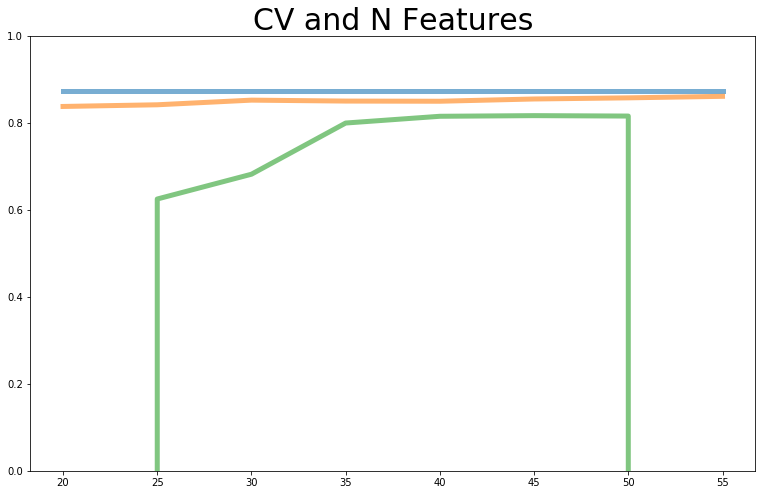

In [46]:
plt.figure(figsize=(13, 8))
plt.plot(feat_selec['n'], feat_selec['manual'], lw=5, alpha=.6)
plt.plot(feat_selec['n'], feat_selec['skb'], lw=5, alpha=.6)
plt.plot(feat_selec['n'], feat_selec['rfe'], lw=5, alpha=.6)
plt.title('CV and N Features', fontsize=30)
plt.ylim(0, 1)

In [47]:
# Max SKB score.
feat_selec.loc[feat_selec['skb'] == feat_selec['skb'].max()]

,n,manual,skb,rfe
7,55,0.872975,0.861101,-7.805814e+20


In [48]:
# Max RFE score.
feat_selec.loc[feat_selec['rfe'] == feat_selec['rfe'].max()]

,n,manual,skb,rfe
5,45,0.872975,0.854988,0.81669


In [49]:
# Pick the best method and n, get our feature list.

# skb = SelectKBest(score_func=f_regression, k=45)
# skb.fit(train_new, train['SalePrice'])
# df_skb = train_new.loc[:, skb.get_support()]
# skb_feats = [x for x in df_skb.columns]
# skb_feats

In [50]:
#man_feat = [x for x in df_manual.columns]
man_feat = [x for x in manual_df.columns]

# 5. ElasticNet Regularization
1. Fit
2. Check out coefficients and scoring

## 1. Fit

In [51]:
X_train = train_new[man_feat]
y = train['SalePrice']
X_test = test_new[man_feat]

In [52]:
# Test for alphas
enet_alphas = np.arange(.01, 1, 0.05)
enet_ratio = 0.9
enet_model = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5)
enet_model = enet_model.fit(X_train, y)

/Users/sam/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sam/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sam/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sam/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. 

/Users/sam/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sam/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sam/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sam/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. 

/Users/sam/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sam/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sam/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sam/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. 

In [53]:
# Optimal alpha
enet_model.alpha_

0.01

## 2. Check out coefficients and scoring predictions

In [54]:
# Coef list

coef_list = []
pdn_list = []
ratios = [.1, .3, .5, .7, .9]
for _ in ratios:
    enet = ElasticNet(alpha=1, l1_ratio=_)
    predictions = enet.fit(X_train, y).predict(X_train)
    pdn_list.append(predictions)
    coef_list.append(enet.coef_)

/Users/sam/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sam/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sam/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sam/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. 

In [55]:
# A visual check of Ridge/Lasso ratios and resulting coefs.
coef_list = pd.DataFrame(coef_list, index=ratios, columns=man_feat).T
coef_list = round(coef_list, 1)

In [56]:
coef_list.sort_values(by=[0.9], ascending=False)

,0.1,0.3,0.5,0.7,0.9
Bsmt Qual_Ex,1096.9,1388.4,1892.4,2973.8,6940.0
Kitchen Qual_Ex,1066.4,1347.5,1831.3,2862.7,6606.0
Overall Cond Garage Cars,499.6,610.5,786.5,1116.9,2019.8
Overall Qual Fireplaces,573.9,695.0,877.5,1185.7,1845.8
Overall Qual TotRms AbvGrd,556.4,632.3,731.0,863.6,1033.9
Full Bath TotRms AbvGrd,165.2,199.6,252.1,342.1,531.7
TotRms AbvGrd Garage Cars,124.2,112.5,78.8,15.4,256.0
1st Flr SF,77.9,77.1,76.0,74.1,70.0
Gr Liv Area Full Bath,25.0,24.9,24.9,25.1,26.0
Garage Cars,5.7,6.5,7.6,9.3,25.0


In [57]:
# Look at our metrics by Ridge/Lasso ratios.
score_df = []
for _ in range(0, len(ratios)):
    
    predictions = pdn_list[_]
    
    score_df.append([mean_squared_error(y, predictions),
                     np.sqrt(mean_squared_error(y, predictions)),
                     median_absolute_error(y, predictions),
                     mean_absolute_error(y, predictions),
                     r2_score(y, predictions)])
    
round(pd.DataFrame(score_df, index=ratios, columns=['mse', '*** rmse ***', 'med_ae', 'mean_ae', 'r2']), 1)

,mse,*** rmse ***,med_ae,mean_ae,r2
0.1,602772554.6,24551.4,12135.7,16816.6,0.9
0.3,599856878.4,24492.0,12186.9,16770.5,0.9
0.5,595443681.1,24401.7,12105.3,16699.7,0.9
0.7,587651296.7,24241.5,11963.1,16574.8,0.9
0.9,567948156.4,23831.7,11717.5,16284.9,0.9


In [58]:
# Predictions on training set for plot/scoring

features = man_feat
X = train_new[features]
y = train['SalePrice']

enet = ElasticNet(alpha=1, l1_ratio=.9)
predictions = enet.fit(X, y).predict(X)

/Users/sam/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [59]:
# RMSE

print('mse:', mean_squared_error(y, predictions))
print('rmse:', np.sqrt(mean_squared_error(y, predictions)), '<<<')
print('med_ae:', median_absolute_error(y, predictions))
print('mean_ae:', mean_absolute_error(y, predictions))
print('r2:', r2_score(y, predictions))

mse: 567948156.425
rmse: 23831.6628968 <<<
med_ae: 11717.4951473
mean_ae: 16284.9278125
r2: 0.909546151487


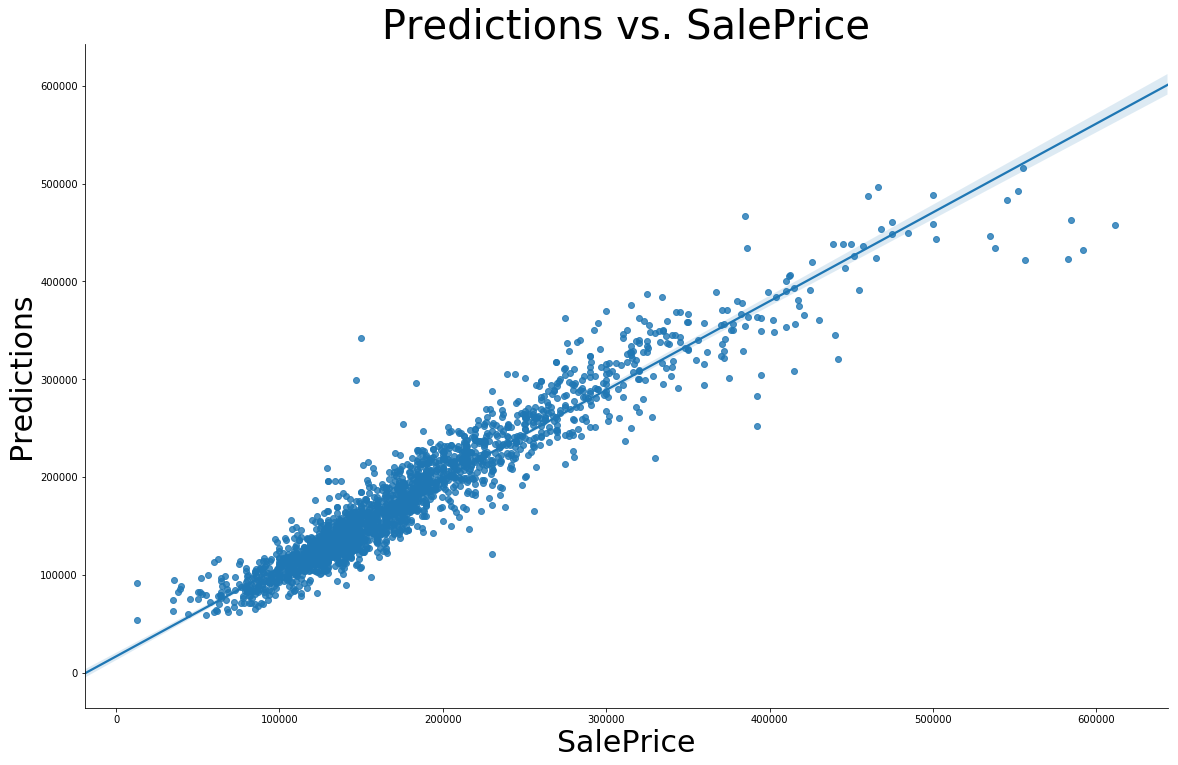

In [60]:
plot_df = pd.concat([X, y, pd.DataFrame([x for x in predictions], columns=['predictions'])], axis=1)
sns.lmplot('SalePrice', 'predictions', data=plot_df, size=10, aspect = 1.62)
plt.title('Predictions vs. SalePrice', fontsize=40)
plt.xlabel('SalePrice', fontsize=30)
plt.ylabel('Predictions', fontsize=30);

# 6. Make submission prediction .csv

In [130]:
# Predictions on test

enet = ElasticNet(alpha=1, l1_ratio=.9)
enet.fit(X_train, y)
predictions = enet.predict(X_test)

/Users/sam/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [131]:
# Get submissions
submission = pd.DataFrame(pd.concat([pd.DataFrame(test['Id']), pd.DataFrame(predictions)], axis=1))
submission = submission.rename({0: 'SalePrice'}, axis=1)
submission = submission.reset_index(drop=True)
submission = submission.set_index('Id')

In [132]:
# Check to make sure Id is right.
submission

,SalePrice
Id,
2658,152979.154514
2718,120615.117377
2414,178501.579066
1989,113456.475431
625,179231.201222
333,112217.473744
1327,122262.974578
858,149704.610127
95,184449.646954


In [133]:
submission.to_csv('sub16.csv')